# Accidents in France (2005 - 2016)

## Merging dataframes and Cleaning data


The dataset comprises of 5 csv files, from which 3 csv files have been used in this analysis. The dataset has been  downloaded from [Kaggle](https://www.kaggle.com/ahmedlahlou/accidents-in-france-from-2005-to-2016). In this notebook, we perform some preliminary Exploratory Data Analysis on this dataset.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [2]:
#Read 'caracteristics.csv' file as df1
df1=pd.read_csv('caracteristics.csv',encoding='latin-1', usecols=[0,1,2,3,4,5,6,7,8],
                names=['acc_id','year','month','day','hr_min','lighting','location','intersection_type','atm'],
                parse_dates=[1,2,3,4], header=0)

In [3]:
#Examine df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839985 entries, 0 to 839984
Data columns (total 9 columns):
acc_id               839985 non-null int64
year                 839985 non-null object
month                839985 non-null object
day                  839985 non-null object
hr_min               839985 non-null object
lighting             839985 non-null int64
location             839985 non-null int64
intersection_type    839985 non-null int64
atm                  839930 non-null float64
dtypes: float64(1), int64(4), object(4)
memory usage: 57.7+ MB


The columns 'year','month', 'day' and 'hr-min' have not been parsed as datetime. This will be addressed below.

In [4]:
#Examine first 5 rows of df1
df1.head()

,acc_id,year,month,day,hr_min,lighting,location,intersection_type,atm
0,201600000001,16,2,1,1445,1,2,1,8.0
1,201600000002,16,3,16,1800,1,2,6,1.0
2,201600000003,16,7,13,1900,1,1,1,1.0
3,201600000004,16,8,15,1930,2,2,1,7.0
4,201600000005,16,12,23,1100,1,2,3,1.0


In [5]:
df1.tail()

,acc_id,year,month,day,hr_min,lighting,location,intersection_type,atm
839980,200500087950,5,12,21,2035,5,2,2,1.0
839981,200500087951,5,12,23,1010,1,2,1,1.0
839982,200500087952,5,12,26,1715,1,2,2,1.0
839983,200500087953,5,12,27,1500,1,2,3,2.0
839984,200500087954,5,12,31,2100,5,2,1,2.0


The values under year column have been reported as 5-16 for years 2005-2016. We therefore need to concatenate these values with either '200' or '20' as appropriate.

In [6]:
#concatenate strings in year column
df1['year'] = df1['year'].astype(int)
subset1 = df1.loc[df1['year']<10]
subset2 = df1.loc[df1['year']>=10]
subset1['year'] = subset1['year'].apply(lambda x: '200'+str(x))
subset2['year'] = subset2['year'].apply(lambda x: '20'+str(x))
df1=pd.concat([subset1,subset2]).sort_index()
df1.head()

,acc_id,year,month,day,hr_min,lighting,location,intersection_type,atm
0,201600000001,2016,2,1,1445,1,2,1,8.0
1,201600000002,2016,3,16,1800,1,2,6,1.0
2,201600000003,2016,7,13,1900,1,1,1,1.0
3,201600000004,2016,8,15,1930,2,2,1,7.0
4,201600000005,2016,12,23,1100,1,2,3,1.0


In [7]:
#split column hr-min into hr and min columns
df1['hr_min'] = df1['hr_min'].astype(str)
df1['minute'] = df1['hr_min'].apply(lambda x: x[-2:])
df1['hour'] = df1['hr_min'].apply(lambda x: x[:-2])
df1.drop('hr_min',axis=1,inplace=True)
df1['hour'].replace('',0,inplace=True)

In [8]:
#create date column as datetime from year,month, day columns
import datetime
df1['date'] = pd.to_datetime(df1[['year','month','day']])

In [9]:
#drop missing values if any
df1.dropna(inplace=True)

In [10]:
#examine df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839930 entries, 0 to 839984
Data columns (total 11 columns):
acc_id               839930 non-null int64
year                 839930 non-null object
month                839930 non-null object
day                  839930 non-null object
lighting             839930 non-null int64
location             839930 non-null int64
intersection_type    839930 non-null int64
atm                  839930 non-null float64
minute               839930 non-null object
hour                 839930 non-null object
date                 839930 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 76.9+ MB


We have 839930 entries with no missing values in any column. Column 'date' has been created as datetime.

In [11]:
#check for duplicate rows in df1
df1.duplicated().sum()

0

In [12]:
#read csv file containing list of public holidays in France from 2005-2016
df2 = pd.read_csv('holidays.csv', parse_dates=['ds'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 2 columns):
ds         132 non-null datetime64[ns]
holiday    132 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 2.1+ KB


In [13]:
#add a column to df2
df2['public_holiday'] = 'yes'
df2.head()

,ds,holiday,public_holiday
0,2005-01-01,New year,yes
1,2005-03-28,Easter Monday,yes
2,2005-05-01,Labour Day,yes
3,2005-05-05,Ascension Thursday,yes
4,2005-05-08,Victory in Europe Day,yes


In [14]:
#check for rows in df2 with same dates
duplicate_dates = df2[df2['ds'].duplicated()]
duplicate_dates

,ds,holiday,public_holiday
36,2008-05-01,Labour Day,yes


In [15]:
#drop rows with duplicate dates in df2
df2.drop(df2.index[36], inplace=True)

In [16]:
#merge df1 and df2 on dates.
df12 = pd.merge(df1,df2,left_on='date',right_on='ds',how='left')
df12['public_holiday'] = df12['public_holiday'].replace(np.NaN, 'No')
df12.drop('ds',axis=1,inplace=True)
df12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839930 entries, 0 to 839929
Data columns (total 13 columns):
acc_id               839930 non-null int64
year                 839930 non-null object
month                839930 non-null object
day                  839930 non-null object
lighting             839930 non-null int64
location             839930 non-null int64
intersection_type    839930 non-null int64
atm                  839930 non-null float64
minute               839930 non-null object
hour                 839930 non-null object
date                 839930 non-null datetime64[ns]
holiday              18419 non-null object
public_holiday       839930 non-null object
dtypes: datetime64[ns](1), float64(1), int64(4), object(7)
memory usage: 89.7+ MB


In [17]:
#read csv file containing user information
df3 = pd.read_csv('users.csv',parse_dates=['an_nais'])

In [18]:
#rename columns 
df3.rename(columns={'Num_Acc':'acc_id','grav':'severity','sexe':'gender','trajet':'trip_reason','an_nais':'birth_year','catu':'user_category'}, inplace=True)

#drop columns that will not be used for analysis
df3.drop(['place','secu','locp','actp','etatp','num_veh'],axis=1,inplace=True)

In [19]:
#examine first 5 rows of df3
df3.head()

,acc_id,user_category,severity,gender,trip_reason,birth_year
0,201600000001,1,1,2,0.0,1983-01-01
1,201600000001,1,3,1,9.0,2001-01-01
2,201600000002,1,3,1,5.0,1960-01-01
3,201600000002,2,3,1,0.0,2000-01-01
4,201600000002,2,3,2,0.0,1962-01-01


In [20]:
#drop rows with same accident id
df3 = df3.drop_duplicates(subset='acc_id',keep='first')
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839985 entries, 0 to 1876003
Data columns (total 6 columns):
acc_id           839985 non-null int64
user_category    839985 non-null int64
severity         839985 non-null int64
gender           839985 non-null int64
trip_reason      839915 non-null float64
birth_year       838934 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 44.9 MB


In [21]:
#merge df3 with df12 on acc_id
df123 = df12.merge(df3)
df123.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839930 entries, 0 to 839929
Data columns (total 18 columns):
acc_id               839930 non-null int64
year                 839930 non-null object
month                839930 non-null object
day                  839930 non-null object
lighting             839930 non-null int64
location             839930 non-null int64
intersection_type    839930 non-null int64
atm                  839930 non-null float64
minute               839930 non-null object
hour                 839930 non-null object
date                 839930 non-null datetime64[ns]
holiday              18419 non-null object
public_holiday       839930 non-null object
user_category        839930 non-null int64
severity             839930 non-null int64
gender               839930 non-null int64
trip_reason          839861 non-null float64
birth_year           838879 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(7), object(7)
memory usage: 121.8+ MB


In [22]:
#drop rows with missing values in columns 'trip_reason' and 'birth_year'
df123.dropna(subset=['trip_reason','birth_year'],inplace=True)

In [23]:
#add column to df123 by calculating age of user when accident occured
df123['age'] = (df123['date']-df123['birth_year'])/np.timedelta64(1,'Y')
df123['age'] = df123['age'].astype(int)

#drop 'birth_year' column
df123.drop('birth_year',axis=1,inplace=True)
df123.head()

,acc_id,year,month,day,lighting,location,intersection_type,atm,minute,hour,date,holiday,public_holiday,user_category,severity,gender,trip_reason,age
0,201600000001,2016,2,1,1,2,1,8.0,45,14,2016-02-01,NaN,No,1,1,2,0.0,33
1,201600000002,2016,3,16,1,2,6,1.0,00,18,2016-03-16,NaN,No,1,3,1,5.0,56
2,201600000003,2016,7,13,1,1,1,1.0,00,19,2016-07-13,NaN,No,1,1,1,1.0,19
3,201600000004,2016,8,15,2,2,1,7.0,30,19,2016-08-15,Assumption of Mary to Heaven,yes,1,3,1,5.0,17
4,201600000005,2016,12,23,1,2,3,1.0,00,11,2016-12-23,NaN,No,1,3,2,3.0,59


In [24]:
#convert year,month,day,hour and minute columns to data type int
df123[['year','month','day','minute','hour']] = df123[['year','month','day','minute','hour']].astype(int)


## Decoding of columns
Several columns in this dataframe are encoded as numeric but which are actually 'categorical'. The link where the dataset was obtained from contains information about these numeric encodings. To make better sense of data, the numeric encodings can be converted to text form.

In [25]:
#make a copy of dataframe
df = df123.copy()

In [26]:
#Change column types from numeric to str
columns = ['lighting','location','intersection_type','user_category','atm','severity','gender','trip_reason']
for col in columns:
    df[col] = df[col].astype(str)

In [27]:
#convert numeric encodings to text
lighting = {'1':'Full Day','2':'Twilight/Dawn','3':'Night without public lighting','4':'Night with public lighting not lit','5':'Night with public lighting on'}
location = {'1':'Out of agglomeration','2':'In built-up areas'}
intersection_type = {'1': 'Out of intersection','2':'Intersection in X','3':'Intersection in T','4':'Intersection in Y','5':'Intersection with more than 4 branches',
                    '6':'Giratory','7':'Place','8':'Level crossing','0':'Other intersection', '9':'Other intersection'}
user_category = {'1': 'Driver','2':'Passenger','3':'Pedestrian','4':'Roller/Scooter'}
atm = {'1.0':'Normal','2.0':'Light rain','3.0':'Heavy rain','4.0':'Snow - hail','5.0':'Fog-smoke','6.0':'Strong wind - storm','7.0':'Dazzling weather','8.0':'Cloudy weather','9.0':'Other'}
severity = {'1':'Unscathed','2':'Killed','3':'Hospitalized wounded','4':'Light injury'}
gender = {'1':'Male','2':'Female'}
trip_reason = {'0.0':'Other','1.0':'Home - work','2.0':'Home - school','3.0':'Shopping','4.0':'Professional', '5.0':'Promenade - leisure','9.0':'Other'}

dict_list = [lighting,location,intersection_type,user_category,atm,severity,gender,trip_reason]

for col in range(8):
    df[columns[col]] = df[columns[col]].apply(lambda x: dict_list[col][x])

In [28]:
#rearranging columns in dataframe
df = df[['acc_id','date','year','month','day','hour','minute','age','gender','public_holiday','holiday','user_category','severity','trip_reason','lighting','location','intersection_type','atm']]
df.head()

,acc_id,date,year,month,day,hour,minute,age,gender,public_holiday,holiday,user_category,severity,trip_reason,lighting,location,intersection_type,atm
0,201600000001,2016-02-01,2016,2,1,14,45,33,Female,No,NaN,Driver,Unscathed,Other,Full Day,In built-up areas,Out of intersection,Cloudy weather
1,201600000002,2016-03-16,2016,3,16,18,0,56,Male,No,NaN,Driver,Hospitalized wounded,Promenade - leisure,Full Day,In built-up areas,Giratory,Normal
2,201600000003,2016-07-13,2016,7,13,19,0,19,Male,No,NaN,Driver,Unscathed,Home - work,Full Day,Out of agglomeration,Out of intersection,Normal
3,201600000004,2016-08-15,2016,8,15,19,30,17,Male,yes,Assumption of Mary to Heaven,Driver,Hospitalized wounded,Promenade - leisure,Twilight/Dawn,In built-up areas,Out of intersection,Dazzling weather
4,201600000005,2016-12-23,2016,12,23,11,0,59,Female,No,NaN,Driver,Hospitalized wounded,Shopping,Full Day,In built-up areas,Intersection in T,Normal


In [29]:
#examine shape of final dataframe
df.shape

(838810, 18)

In [30]:
#check if each acc_id in the dataframe is unique
df['acc_id'].nunique()


838810

## Exploratory Data Analysis

### 1. Trend in Number of Accidents (2005 - 2016)

The simplest yet most valuable information we would like to obtain is the trend in number of accidents from 2005 to 2016. 

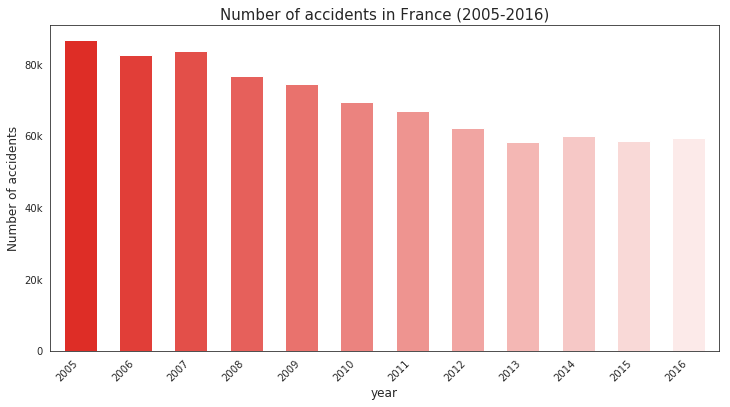

In [31]:
#group df by year, select acc_id column,count the number of accidents and create a bar plot

sns.set_style("white")
num_accidents = df.groupby('year')['acc_id'].count().plot.bar(figsize=(12,6),width=0.6,color=sns.light_palette('#de2d26',12, reverse=True))
num_accidents.set_xlabel('year',fontsize=12)
num_accidents.set_ylabel('Number of accidents',fontsize=12)
labels = ['0','20k','40k','60k','80k']
num_accidents.set_yticklabels(labels=labels)
num_accidents.set_xticklabels(labels=np.arange(2005,2017,1),rotation=45,ha='right')
num_accidents.set_title('Number of accidents in France (2005-2016)',fontsize=15);

It is good to know that overall the accident numbers have decreased from year 2005. The numbers are more or less consistent at ~ 65k from years 2013 - 2016.

### 2. Months with highest and lowest number of accidents
An important piece of information would be to find out which months have the highest frequency of accidents. For this, we can group the df by year and month,count number of accidents and create line charts for every year to see if there is a trend. To avoid crowding of dta, I have plot line charts for alternate years from 2005 upto 2015. 

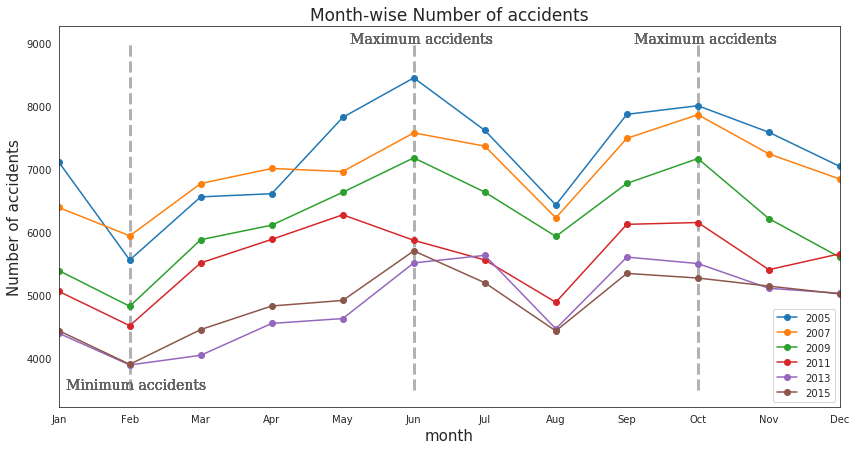

In [32]:
# line plot of month wise accidents

#group df by year and month, select acc_id column, count number of accidents and create line plots for years
by_year_month = df.groupby(['year','month'])['acc_id'].count().sort_index()

months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
font_max = {'family': 'serif','color':  '#636363','weight': 'normal','size': 14}
font_min = {'family': 'serif','color':  '#636363','weight': 'normal','size': 14}

for yr in range(2005,2017,2):
    line_plot = by_year_month.loc[yr].plot(label=yr, figsize=(14,7),marker='o')
    line_plot.legend(loc='lower right')
    line_plot.set_xticks(np.arange(1,13,1))
    line_plot.set_xticklabels(months)
    line_plot.set_yticks(np.arange(0,10000,1000))
    line_plot.set_yticklabels([0,1000,2000,3000,4000,5000,6000,7000,8000,9000])
    line_plot.set_xlabel('month', fontsize = 15)
    line_plot.set_ylabel('Number of accidents', fontsize=15)
    line_plot.set_title('Month-wise Number of accidents', fontsize=17)
    line_plot.vlines(x = [2,6,10],ymin=3500, ymax=9000, linestyles='dashed', color='#636363', linewidth=3,alpha=0.1)
    line_plot.text(5.1,9000,'Maximum accidents', fontdict=font_max)
    line_plot.text(9.1,9000,'Maximum accidents', fontdict=font_max)
    line_plot.text(1.1,3500, 'Minimum accidents',fontdict=font_min)



Lowest number of accidents occur in February, followed by a dip in August. Highest number of accidents occur in the months of June and October.

### 3. Frequency of accidents during the day (year 2016)
We can also find out what times of the day do accidents occur most frequently. For this, I have created a subset of accidents occuring in year 2016. The subset was then grouped by 'hour' with counting the number of accidents at each hour.

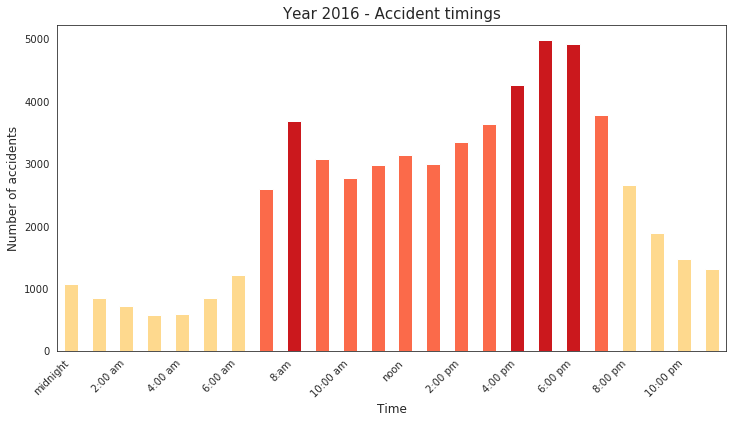

In [33]:
#bar plot of accidents at various hours of the day in year 2016

#filter df for year 2016
df_2016 = df[df['year']==2016]

labels=['midnight','','2:00 am','','4:00 am','','6:00 am','','8:am','','10:00 am','',
        'noon','','2:00 pm','','4:00 pm','','6:00 pm','','8:00 pm','','10:00 pm']
a='#fed98e'
b='#fb6a4a'
c='#cb181d'
colors=[a,a,a,a,a,a,a,b,c,b,b,b,b,b,b,b,c,c,c,b,a,a,a,a]

#group subset by hour, count the number of accidents and create a bar plot.
ax = df_2016.groupby('hour')['acc_id'].count().plot(kind='bar',figsize=(12,6),color=colors)
ax.set_xticklabels(labels =labels,rotation=45,ha='right')
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Number of accidents', fontsize=12)
ax.set_title('Year 2016 - Accident timings', fontsize=15);

The number of accidents are high at around 8:00 am, decreasing slightly and remaining consistent upto 3:00 pm. The numbers shoot up after 4:00 pm, being highest at 5:00 to 6:00 pm, and then gradually decreasing upto midnight. Thus highest number of accidents occur during normal commute times, specifically during the evening. Let us confirm this in the next plot.

### 4. Trip reasons during the day 
As we found the timings of the day when accidents occur most frequently, we would also like to know the trip reasons during those times. For this I created a stacked bar chart for each hour. Each bar is subdivided into categories of trip reasons.

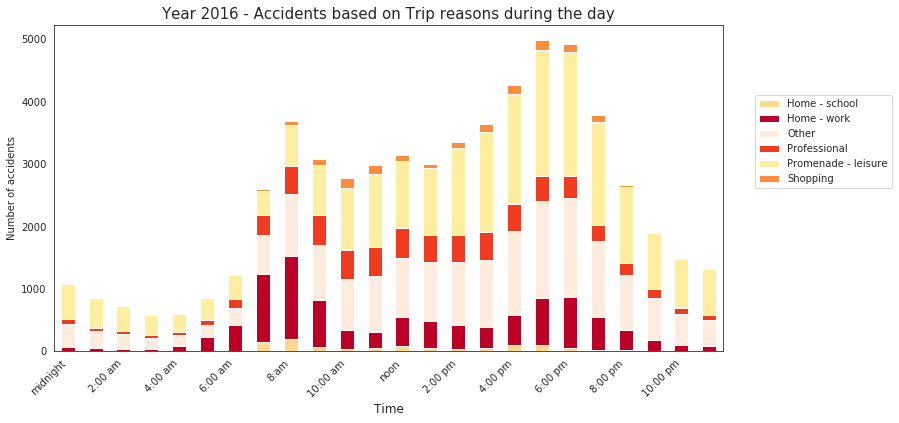

In [34]:
#group subset by hour and trip_reason, select acc_id and  count the number of accidents, create a stacked bar plot.
hr_trip = df_2016.groupby(['hour','trip_reason'])['acc_id'].count()

colors = ['#fed98e','#bd0026','#feedde','#f03b20','#ffeda0','#fd8d3c']
labels=['midnight','','2:00 am','','4:00 am','','6:00 am','','8:am','','10:00 am','',
        'noon','','2:00 pm','','4:00 pm','','6:00 pm','','8:00 pm','','10:00 pm']
ax=hr_trip.unstack().plot.bar(stacked=True,figsize=(12,6),color=colors)
ax.set_xticklabels(labels=labels,rotation=45,ha='right')
ax.legend(loc=9, bbox_to_anchor=(1.15,0.8))
ax.set_xlabel('Time',fontsize=12)
ax.set_ylabel('Number of accidents')
ax.set_title('Year 2016 - Accidents based on Trip reasons during the day', fontsize=15);

As expected, the rise in number of accidents at around 7:00 -8:00 am is primarily due to commute from home to work/professional reasons. During the evening, apart from work-home commute, a lot accidents occur with people on a promenade/leisure ride as well. 

### 5. Age distribution of users incurring accidents
We can plot a histogram to examine the distributuon of age of users incurring accidents.

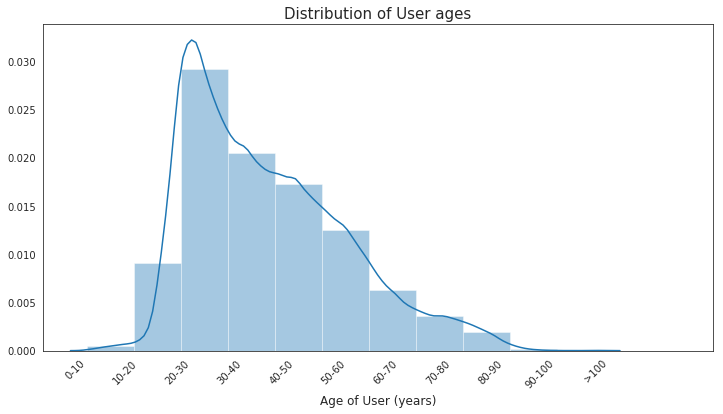

In [35]:
#plot a histogram of age column
plt.figure(figsize=(12, 6))
labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','>100']
age = sns.distplot(df['age'],bins=11)
age.set_xlabel('Age of User (years)', fontsize=12)
age.set_xticks(range(0,140,11))
age.set_xticklabels(labels=labels, rotation=45,ha='right')
age.set_title('Distribution of User ages', fontsize=15);

The distribution of age is skewed towards the right, with users in the age group of 20-50 incurring maximum number of accidents.

### 5. Distribution of age in User categories
It may be interesting to compare the distribution of age amongst various user categories. A boxplot is a quick and effective way to visualize this.

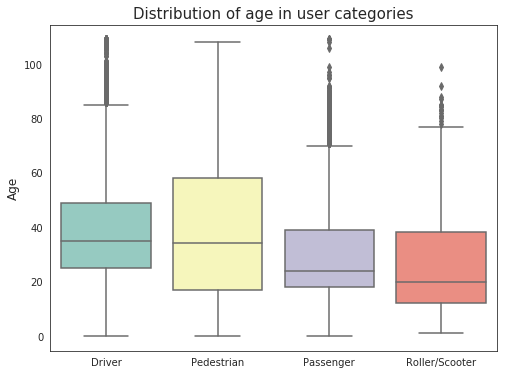

In [36]:
plt.figure(figsize=(8,6))
user_age = sns.boxplot(x='user_category',y='age',data=df,palette="Set3")
user_age.set_xlabel('')
user_age.set_ylabel('Age', fontsize=12)
user_age.set_title('Distribution of age in user categories', fontsize=15);


The median age of Drivers and Pedestrians is ~35 years. 75% of Drivers are under the age of 50 years. Median age of Passengers and Roller/Scooter drivers are ~25 and 18 years respectively. 

### 6. Lighting conditions during accidents
We may want to know the proportion of accidents under various lighting conditions. This can be easily visualized using a pie chart.

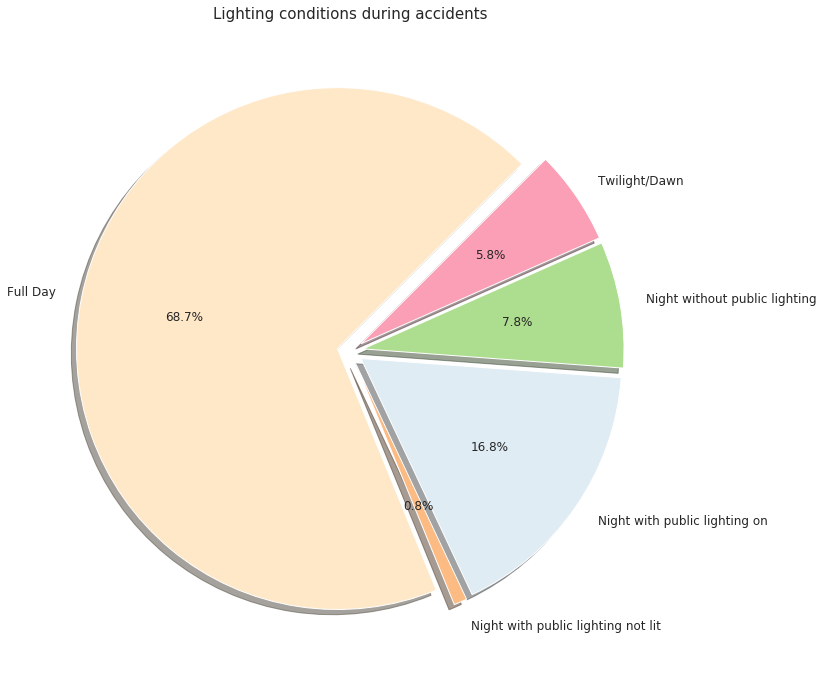

In [37]:
#pie chart of lighting conditions during accidents
#group df by lighting, select acc_id, count number of accidents and plot a pie chart
by_lighting = df.groupby('lighting')['acc_id'].count()
lighting_pie = by_lighting.plot.pie(autopct='%1.1f%%',figsize=(12,12),startangle=45,
                                                    explode=[0.05,0.05,0.05,0.05,0.05],
                                                    fontsize=12,shadow=True, 
                                                    colors=['#fee8c8','#fdbb84','#e0ecf4','#addd8e','#fa9fb5'])

lighting_pie.set_ylabel('')
lighting_pie.set_title('Lighting conditions during accidents', fontsize=15);

Majority of accidents happen under good lighting conditions (either 'Full Day' or at 'Night with public lighting on'). 

### 7.  Severity of accidents in Males and Females
We would like to know the relative proportions of accident severities. A donut chart, which is conceptually similar to pie chart (but donut instead of a pie!) can be used to visualize the relative proportions of accident severities. To further visualize the gender division in each category, we can make a nested donut chart.

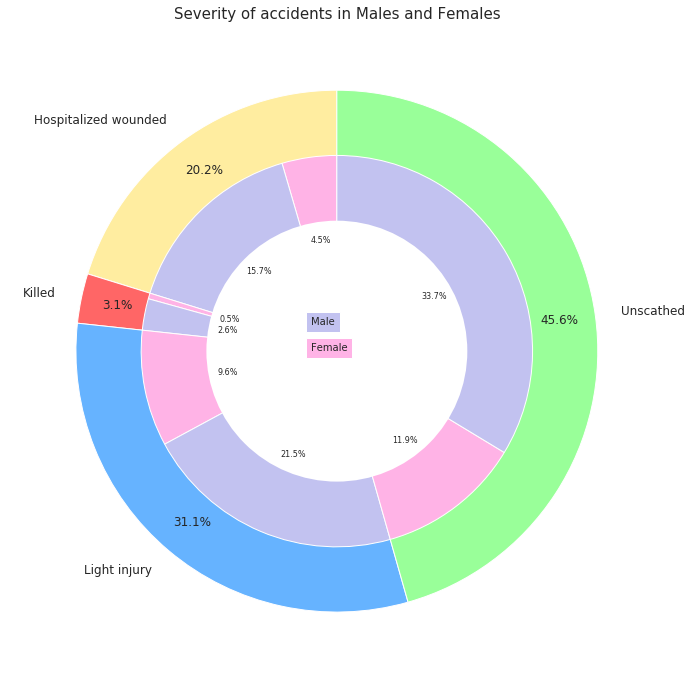

In [38]:
#nested donut chart

#group df by accident severity (for outer ring) and count number of accidents
by_severity = df.groupby('severity')['acc_id'].count()

#group df by severity and gender (for inner ring) and count number of accidents
by_severity_gender = df.groupby(['severity','gender'])['acc_id'].count()


colors=['#ffeda0','#ff6666','#66b3ff','#99ff99'] #for outer ring
colors_gender = ['#ffb3e6','#c2c2f0', '#ffb3e6','#c2c2f0','#ffb3e6','#c2c2f0','#ffb3e6','#c2c2f0'] #for inner ring

#create pie plots and mask the centre with a circle to make donuts
ax = by_severity.plot.pie(autopct='%1.1f%%',pctdistance=0.86,
                        colors=colors,startangle=90,frame=True,figsize=(12,12),fontsize=12)

ax = by_severity_gender.plot.pie(labels=None,autopct='%1.1f%%',pctdistance=0.57,fontsize=8,
                                 colors=colors_gender,radius=0.75,startangle=90)

centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)

ax.add_artist(centre_circle)
ax.text(-0.1,0, 'Female',bbox={'facecolor': '#ffb3e6','pad':5})
ax.text(-0.1,0.1, 'Male',bbox={'facecolor': '#c2c2f0', 'pad':5})
ax.set_title('Severity of accidents in Males and Females',fontsize=15)
ax.set_ylabel('');

The outer ring in the above donut chart displays relative percent of accident severities. The inner ring displays the proportion of males and females under each severity category. Majority of users come out unscathed (46%) or incur only light injuries (31%) during an accident. The proprotion of Males:Females under each severity category, are roughly similar.

### 8. Accidents on Public Holidays
To find the number of accidents occuring on each public holiday, we filter the dataset as accidents occuring on public holidays only. A bar chart would be a good visualization tool here.

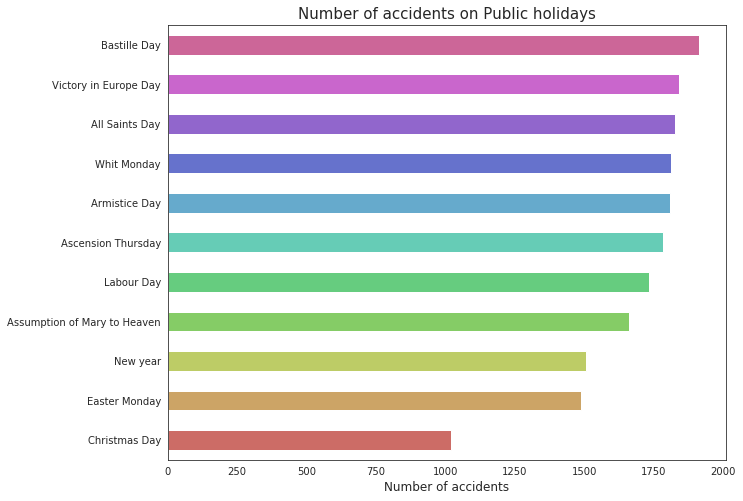

In [39]:
#bar plot of number of accidents on public holidays

#filter df to obtain a subset with accidents on public holidays
public_holidays = df[df['public_holiday']=='yes']

#group subset by holiday, sleect acc_id,count number of accidents and plot a bar chart
holiday = public_holidays.groupby('holiday')['acc_id'].count().sort_values().plot(kind='barh',
                                                                figsize=(10,8),width=0.5,color=sns.hls_palette(11, l=.6, s=.5))
holiday.set_title('Number of accidents on Public holidays',fontsize=15)
holiday.set_xlabel('Number of accidents',fontsize=12)
holiday.set_ylabel('');

Christmas Day has the lowest number of accidents of all public holidays (most probably thanks to Christmas Lunch!). 
The number of accidents are also low on Easter Monday, New Year. On all other Public holidays, the numbers are similar with highest being on Bastille Day.

### 9. Severity of accidents in User Categories
We would like to know the proportion of accident severities in different user categories. A stacked bar chart is a good representation tool that can be used here.

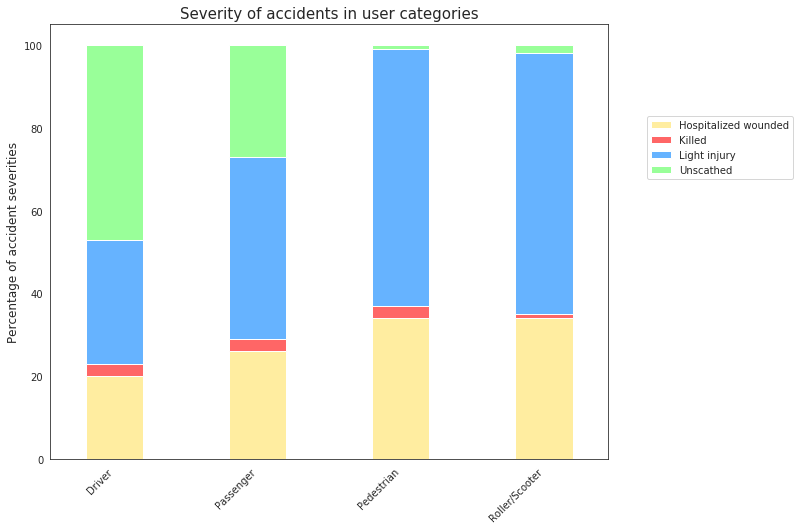

In [40]:
#stacked bar chart of accident severity in different user categories 

#group df by user_category and severity, select acc_id, count the number of accidents
user_sev = df.groupby(['user_category','severity'])['acc_id'].count()

#Convert count values into percentage and plot a stacked bar chart
user_sev_pct = user_sev.groupby(level=0).apply(lambda x: round(100 * x / x.sum()))

colors=['#ffeda0','#ff6666','#66b3ff','#99ff99']
labels=['Driver','Passenger','Pedestrian','Roller/Scooter']

ax=user_sev_pct.unstack().plot.bar(stacked=True,figsize=(10,8), color=colors,width=0.4)
ax.legend(loc=9, bbox_to_anchor=(1.2,0.8))
ax.set_xlabel('')
ax.set_xticklabels(labels=labels,rotation=45,ha='right')
ax.set_ylabel('Percentage of accident severities', fontsize=12)
ax.set_title('Severity of accidents in user categories', fontsize=15);

As expected, Pedestrians and Roller/Scooter drivers are more likely to incur injuries or get hospitalized during accidents as compared to users who are Drivers or Passengers. A very few proportions of Passengers and Roller/Scooter drivers come out unscathed in the event of an accident.

###  10. Heatmap
Since our variables consist of  numeric 'encodings' that do not follow any particular order, there is perhaps little value to visualizing correlation using a heatmap. The stacked bar charts as shown above, better reflect the relationship between categorical variables. We can use df123 dataframe with numeric encodings to create a heatmap.

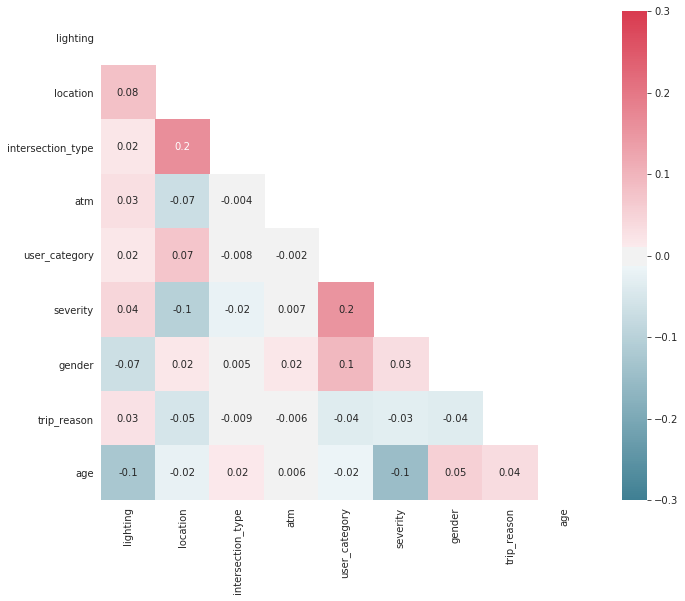

In [41]:
#plot heatmap of df123 with numeric encodings, using selected columns

df123_sel = df123[['lighting','location','intersection_type','atm','user_category','severity','gender','trip_reason','age']]
corr = df123_sel.corr()

plt.figure(figsize=(11,9))

#create mask to hide repetitive other half of heatmap to make it visually appealing
mask = np.triu(np.ones_like(corr, dtype=np.bool))

#create color map
cmap = sns.diverging_palette(220,8,as_cmap=True)

#plot heatmap
sns.heatmap(corr,cmap=cmap,mask=mask, annot=True, fmt='.1g',vmin=-0.3,vmax=0.3);

As also shown in the stacked bar charts above, there is some correlation between __'user_category' & 'severity'__ of accidents and __'intersection_type' & 'location'.__ 